In [15]:
##DecisionTreeClassifier  
#@author:angela 

#Import functions needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score 
from sklearn.utils.class_weight import compute_class_weight
from matplotlib.lines import Line2D



In [16]:
#Current directory
os.getcwd()
#Change working directory
os.chdir('C:\\Users\\Administrador\\Desktop\\python')
os.listdir()

['.ipynb_checkpoints',
 'data.csv',
 'graficos',
 'Model_6800 pairs of DNA.ipynb',
 'model_DecisionTreeClassifier.ipynb',
 'model_hypercholesterolemia.ipynb']

In [17]:
#Loading data: 
pd.read_csv("data.csv", sep=";")
data = pd.read_csv("data.csv",sep=";")
data.head(10) #muestra las primeras 10 filas de la tabla

,n,f(vij/c0)obj,Subset,f(c0)ref,D3(Set1),V2(Set1),D3(Set2),V1(Set2),D3(Set3),D1(Set4)
0,1,0,t,0.325301,2.515821,0.24,3.37,0.1,3.03,58.64
1,2,0,t,0.325301,2.475821,0.24,3.33,0.1,2.99,120.59
2,3,0,t,0.325301,2.475821,-1.01,3.33,0.1,2.99,115.82
3,4,0,v,0.325301,1.735821,0.24,2.59,0.1,2.25,7.90
4,5,0,t,0.325301,0.955821,0.24,1.81,0.1,1.47,2.53
5,6,0,t,0.325301,0.805821,0.24,1.66,0.1,1.32,-20.15
6,7,0,t,0.325301,0.175821,0.24,1.03,0.1,0.69,-25.52
7,8,0,v,0.325301,-0.194179,-1.01,0.66,0.1,0.32,24.49
8,9,0,t,0.325301,-0.194179,0.24,0.66,0.1,0.32,24.49
9,10,0,t,0.325301,-0.604179,0.24,0.25,0.1,-0.09,-53.58


In [18]:
#Data Splitting:
Y= data.iloc[:,1]
X = data.iloc[:, 3:]
print(Y) 
print(X)

0         0
1         0
2         0
3         0
4         0
         ..
369253    0
369254    0
369255    0
369256    0
369257    0
Name: f(vij/c0)obj, Length: 369258, dtype: int64
        f(c0)ref  D3(Set1)  V2(Set1)  D3(Set2)  V1(Set2)  D3(Set3)  D1(Set4)
0       0.325301  2.515821      0.24      3.37       0.1      3.03     58.64
1       0.325301  2.475821      0.24      3.33       0.1      2.99    120.59
2       0.325301  2.475821     -1.01      3.33       0.1      2.99    115.82
3       0.325301  1.735821      0.24      2.59       0.1      2.25      7.90
4       0.325301  0.955821      0.24      1.81       0.1      1.47      2.53
...          ...       ...       ...       ...       ...       ...       ...
369253  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369254  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369255  0.000000 -2.209286     -0.07     -1.82       0.1     -1.74    -61.52
369256  0.000000 -2.209286     -0.07     -1.82   

In [19]:
#Splitting Data into Training and Prediction Sets:
train_data = data[data["Subset"] == "t"]
pred_data = data[data["Subset"] == "v"]

# Model Preparation for Decision Tree
X_train_tree= train_data.iloc[:, 3:]
X_test_tree= pred_data.iloc[:, 3:]
y_train_tree= train_data.iloc[:, 1]
y_test_tree= pred_data.iloc[:, 1]

print(X_test_tree.shape)
print(X_train_tree.shape)
print(y_test_tree.shape)
print(y_train_tree.shape)

(92314, 7)
(276944, 7)
(92314,)
(276944,)


In [20]:
train_data[train_data['f(vij/c0)obj']==0]['f(vij/c0)obj'].count()

np.int64(92858)

In [21]:
train_data[train_data['f(vij/c0)obj']==1]['f(vij/c0)obj'].count()

np.int64(184086)

In [22]:
#DECISION TREE MODEL
#X_tree
mlr_X_train_tree= X_train_tree[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]
mlr_X_test_tree = X_test_tree[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]

# Define class weights to change the prior probability
#class_weights = {0: 0.3, 1: 0.7}  # Example weights, adjust as needed
seed = 40
# Define the decision tree model
tree_model= DecisionTreeClassifier(random_state=seed,class_weight='balanced') #Añadir argumento ccp_alpha=X si el árbol es muy complejo

In [23]:
#Define the hyperparameter search space
param_grid = {
    'criterion': ['gini'],
    'max_depth': [4],
    'min_samples_split': [int(0.01*len(X_train_tree))],
    'min_samples_leaf': [int(0.005*len(X_train_tree))]
}

#'max_depth': [5,6,10]
#'min_samples_split': [int(0.01*len(X_train_tree)),int(0.05*len(X_train_tree)),int(0.1*len(X_train_tree))],
#   'min_samples_leaf': [int(0.005*len(X_train_tree)),int(0.01*len(X_train_tree)),int(0.005*len(X_train_tree))]

# Perform hyperparameter search by cross-validation
grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(mlr_X_train_tree, y_train_tree)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=40),
             param_grid={'criterion': ['gini'], 'max_depth': [4],
                         'min_samples_leaf': [1384],
                         'min_samples_split': [2769]},
             scoring='accuracy')

In [24]:

# Print the best hyperparameters 
best_params = grid_search_tree.best_params_
print("best hyperparameters :", best_params)

best hyperparameters : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1384, 'min_samples_split': 2769}


In [25]:
# make predictions on the train set
y_pred_train_tree = grid_search_tree.predict(mlr_X_train_tree)
# calculate confusion matrix
cm_train_tree = confusion_matrix(y_train_tree, y_pred_train_tree)
print('Confusion matrix:','\n', cm_train_tree)
# calculate performance metrics
tn_train_tree, fp_train_tree, fn_train_tree, tp_train_tree = cm_train_tree.ravel()
specificity_train_tree = tn_train_tree / (tn_train_tree + fp_train_tree)
sensitivity_train_tree = tp_train_tree / (tp_train_tree + fn_train_tree)
accuracy_train_tree = (tp_train_tree + tn_train_tree) / (tp_train_tree + tn_train_tree + fp_train_tree + fn_train_tree)
false_positive_train_tree = fp_train_tree / (fp_train_tree + tn_train_tree)
print('Specificity:',specificity_train_tree,'\n', 'Sensitivity:', sensitivity_train_tree,'\n','Accuracy:', accuracy_train_tree)
mcc_train_tree = matthews_corrcoef(y_train_tree, y_pred_train_tree)

Confusion matrix: 
 [[ 67624  25234]
 [ 46862 137224]]
Specificity: 0.728251739214715 
 Sensitivity: 0.7454341992329672 
 Accuracy: 0.7396730024842567


In [26]:
# make predictions on the test set
y_pred_test_tree = grid_search_tree.predict(mlr_X_test_tree)
#calculate confusion matrix
cm_pred_test_tree = confusion_matrix(y_test_tree, y_pred_test_tree)
print('Confusion matrix:', '\n', cm_pred_test_tree)
# calculate performance metrics on test set
tn_test_tree, fp_test_tree, fn_test_tree, tp_test_tree = cm_pred_test_tree.ravel()
specificity_test_tree = tn_test_tree / (tn_test_tree + fp_test_tree)
sensitivity_test_tree = tp_test_tree / (tp_test_tree + fn_test_tree)
accuracy_test_tree = (tp_test_tree + tn_test_tree) / (tp_test_tree + tn_test_tree + fp_test_tree + fn_test_tree)
false_positive_test_tree = fp_test_tree / (fp_test_tree + tn_test_tree)
print('Specificity;', specificity_test_tree,'\n','Sensitivity:', sensitivity_test_tree,'\n', 'Acurracy:', accuracy_test_tree)

Confusion matrix: 
 [[22532  8411]
 [15636 45735]]
Specificity; 0.7281776169085092 
 Sensitivity: 0.7452216845089701 
 Acurracy: 0.7395086335767056


In [40]:
clase_0_predichos = cm_pred_test_tree[0, 0] + cm_pred_test_tree[0, 1]
clase_1_predichos = cm_pred_test_tree[1, 0] + cm_pred_test_tree[1, 1]
print(clase_0_predichos, clase_1_predichos)
print(clase_0_predichos/(clase_0_predichos+clase_1_predichos))
print(clase_1_predichos/(clase_1_predichos+clase_0_predichos))

30943 61371
0.3351929284832203
0.6648070715167796


In [27]:
# Calcular los pesos de clase automáticamente
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_tree), y=y_train_tree)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Pesos de clase calculados automáticamente:", '\n', class_weights_dict)

Pesos de clase calculados automáticamente: 
 {0: np.float64(1.4912231579400805), 1: np.float64(0.7522136392772943)}


In [41]:
# Exportar el árbol a un archivo DOT
dot_data = export_graphviz(grid_search_tree.best_estimator_, out_file=None, feature_names=mlr_X_train_tree.columns,  
    class_names=['Clase 0', 'Clase 1'], filled=True, rounded=True, special_characters=True)  

# Añadir atributos de tamaño y relación directamente en el archivo DOT
dot_data = 'digraph Tree {\n' + 'ratio="compress";\n' + dot_data.split('digraph Tree {', 1)[1]  
    #si se quiere cambiar el color del fondo añadir +'bgcolor="#cad5db";\n'

# Crear un gráfico a partir del archivo DOT
graph = graphviz.Source(dot_data)
graph.render(filename= os.path.join('C:\\Users\\Administrador\\Desktop\\python\\graficos', 'Árbol_4_niveles'), 
             format='png', cleanup=True)


# Mostrar el gráfico
graph.view()

'C:\\Users\\Administrador\\Desktop\\python\\graficos\\Árbol_4_niveles.pdf'

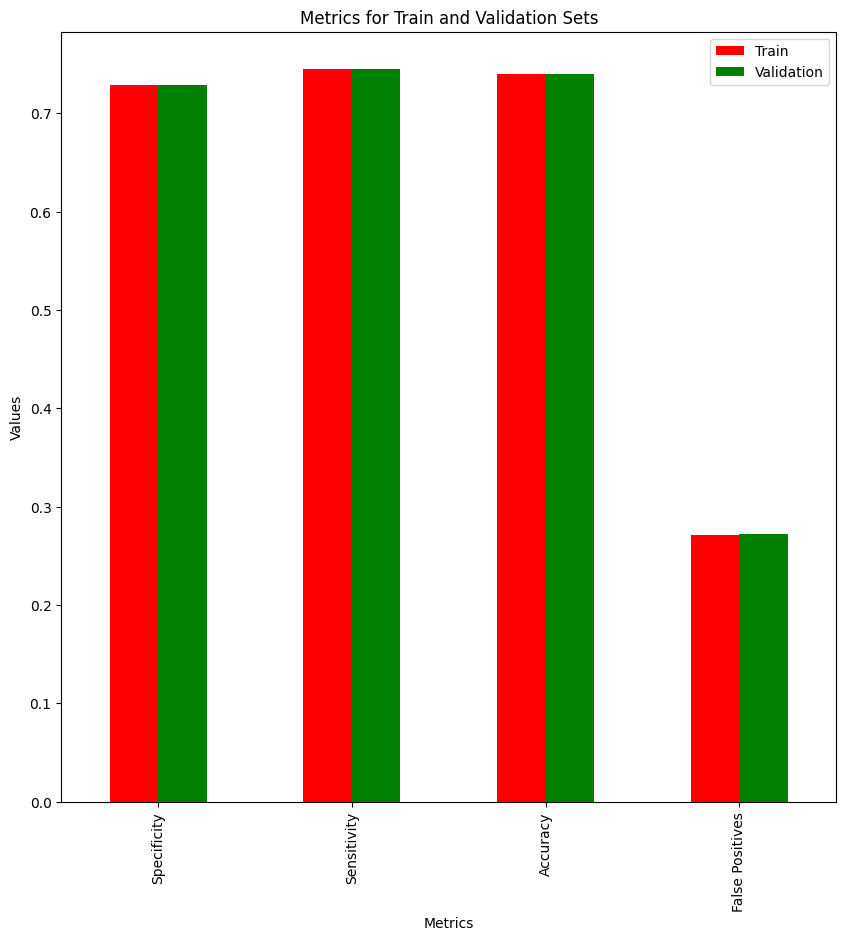

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Valores de especificidad, sensibilidad, accuracy y falsos positivos para el train test y el validation
metrics = {
    'Train': {
        'Specificity': specificity_train_tree,
        'Sensitivity': sensitivity_train_tree,
        'Accuracy': accuracy_train_tree,
        'False Positives': false_positive_train_tree
    },
    'Validation': {
        'Specificity': specificity_test_tree,
        'Sensitivity': sensitivity_test_tree,
        'Accuracy': accuracy_test_tree,
        'False Positives': false_positive_test_tree
    }
}

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(metrics)

# Configurar el gráfico de barras
ax = df.plot(kind='bar', figsize=(10,10), color=['red', 'green'])  # Colores de las barras
#ax.set_facecolor('#cad5db')
#plt.gcf().set_facecolor('#cad5db')


# Añadir etiquetas y título
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics for Train and Validation Sets')

# Mostrar el gráfico
plt.show()
